In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 获取当前文件所在目录的父目录
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)


from Dtool import fill_missing_values, plot_factors_by_pattern, plot_comparison_multiple, reverse_column, plot_feature_importance,plot_predictions


In [15]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
######## 读取数据 ########
sheet = pd.read_excel('data_input/WTI_映射残差_EIA去库幅度.xlsx', sheet_name='Sheet1').rename(columns={'DataTime': 'Date'})
sheet.set_index('Date', inplace=True) 
sheet = sheet.reset_index().rename(columns={'index': 'Date'})

In [16]:
sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   Date                                                                     38 non-null     datetime64[ns]
 1   WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5      38 non-null     float64       
 2   WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Non-Trend/F0.5  38 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.0 KB


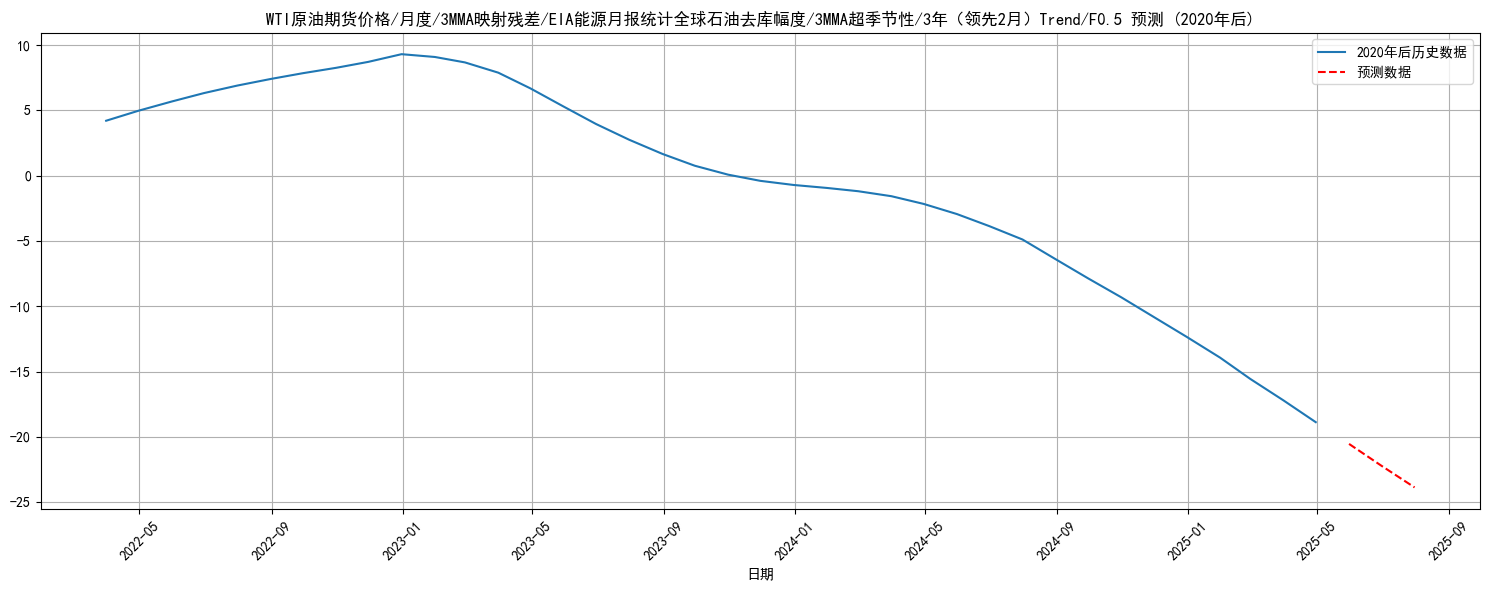

In [17]:
sheet = sheet.dropna()
# 获取最后一个日期
last_date = pd.to_datetime(sheet['Date'].iloc[-1])
# 生成未来3个月的预测日期
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='ME')

# 获取最后2个月的历史值用于线性回归
last_values = sheet['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5'].tail(2).values
x = np.arange(len(last_values))
y = last_values
# 进行线性回归
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# 预测未来3个月的值
future_x = np.arange(len(last_values), len(last_values) + 3)
future_values = p(future_x)

# 创建预测数据框
future_df = pd.DataFrame({
    'Date': future_dates,
    'WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5': future_values
})

# 合并历史数据和预测数据
sheet_with_predictions = pd.concat([sheet, future_df], ignore_index=True)

# 筛选2020年之后的数据
sheet_2020 = sheet[sheet['Date'] >= '2020-01-01']

# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(sheet_2020['Date'], sheet_2020['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5'], label='2020年后历史数据')
plt.plot(future_df['Date'], future_df['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5'], 'r--', label='预测数据')
plt.title('WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5 预测 (2020年后)')
plt.xlabel('日期')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
########################   读取数据  #########################################
sheet_non_trend = pd.read_excel('eta/WTI_月度_映射残差_去库幅度_nontrend_月度数据.xlsx', sheet_name='Sheet1')
sheet_non_trend['Date'] = pd.to_datetime(sheet_non_trend['Date'])
# trend + non-trend 
merged_df = pd.merge(
    sheet_non_trend[['Date', '预测值']], 
    future_df[['Date', 'WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5']], 
    on='Date',
    how='outer'
)
# 删除包含空值的行
merged_df = merged_df.dropna()
# 计算最终的
merged_df['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）'] = merged_df['预测值'] + merged_df['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5']
merged_df.head() 

,Date,预测值,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）
28,2025-05-31,0.6,-20.5388,-19.9388
29,2025-06-30,1.5,-22.2033,-20.7033
30,2025-07-31,4.1,-23.8678,-19.7678


In [19]:
sheet['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）'] = sheet['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Non-Trend/F0.5'] + sheet['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5']

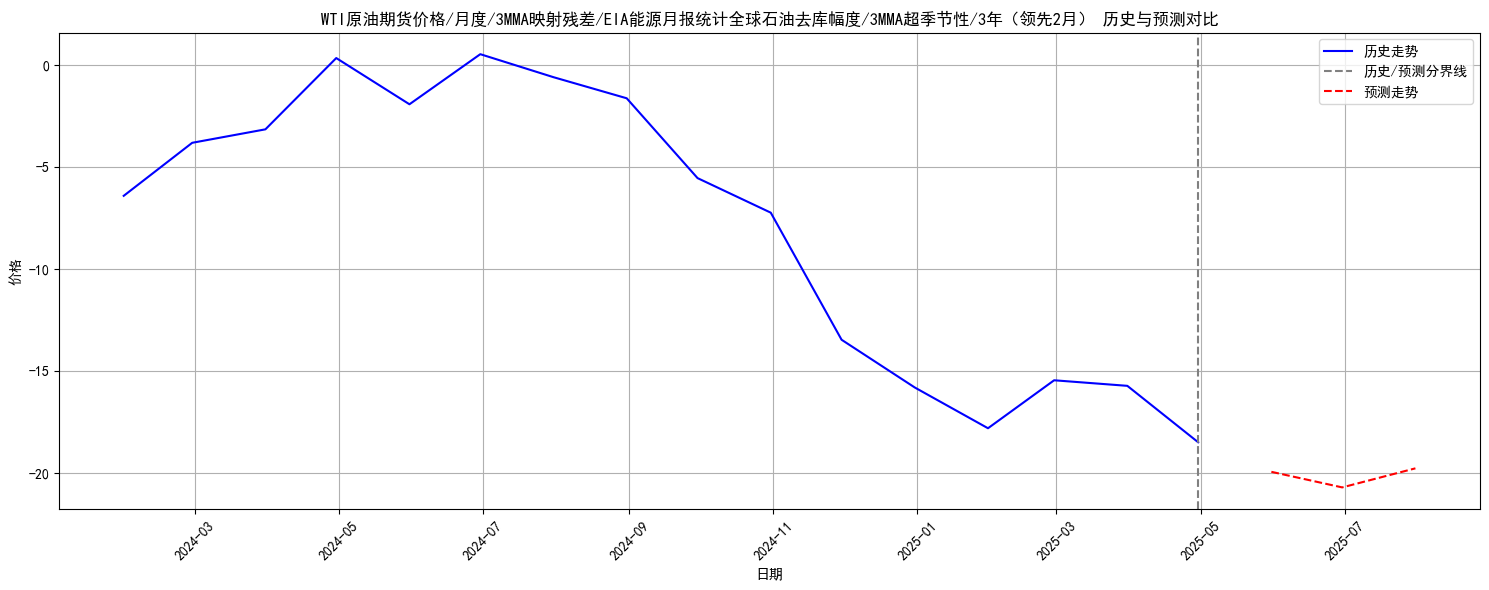

In [20]:
# 绘制最终走势图
plt.figure(figsize=(15, 6))
# 筛选2020年之后的数据
sheet_2020 = sheet[sheet['Date'] >= '2024-01-01']
# 绘制历史数据
plt.plot(sheet_2020['Date'], sheet_2020['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）'], label='历史走势', color='blue')
# 添加垂直分隔线,标记历史数据和预测数据的分界点
last_historical_date = sheet_2020['Date'].iloc[-1]
plt.axvline(x=last_historical_date, color='gray', linestyle='--', label='历史/预测分界线')
# 绘制预测数据
plt.plot(merged_df['Date'], merged_df['WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）'], label='预测走势', color='red', linestyle='--')

plt.title('WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月） 历史与预测对比')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
sheet_data_2023_shizhi = sheet[sheet['Date'].dt.year >= 2023][['Date', 'WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）']]
sheet_data_2023_shizhi.columns = ['Date', '实际值']
future_df_shizhi = merged_df[['Date', 'WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）']]
merged_df_shizhi = pd.merge(sheet_data_2023_shizhi, future_df_shizhi, on='Date', how='outer')
merged_df_shizhi = merged_df_shizhi.sort_values('Date', ascending=False)
merged_df_shizhi['Date'] = merged_df_shizhi['Date'].dt.strftime('%Y/%m/%d')
merged_df_shizhi.to_excel('eta/Wti_月度_映射残差_去库幅度_合并数据.xlsx', index=False,float_format='%.2f')
merged_df_shizhi.head()

,Date,实际值,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）
30,2025/07/31,NaN,-19.7678
29,2025/06/30,NaN,-20.7033
28,2025/05/31,NaN,-19.9388
27,2025/04/30,-18.4885,NaN
26,2025/03/31,-15.7201,NaN


In [22]:
# 将日期列转换为datetime格式
merged_df_shizhi['Date'] = pd.to_datetime(merged_df_shizhi['Date'])
# 按月份重采样并取每月最后一个交易日的数据
monthly_df_shizhi = merged_df_shizhi.set_index('Date').resample('ME').last()
monthly_df_shizhi = monthly_df_shizhi.sort_values('Date', ascending=False)
# 重置索引并格式化日期
monthly_df_shizhi = monthly_df_shizhi.reset_index()
monthly_df_shizhi['Date'] = monthly_df_shizhi['Date'].dt.strftime('%Y/%m/%d')
# 保存月度数据到Excel
monthly_df_shizhi.to_excel('eta/Wti_月度_映射残差_去库幅度_月度数据.xlsx', index=False, float_format='%.2f')
monthly_df_shizhi.head()

,Date,实际值,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）
0,2025/07/31,NaN,-19.7678
1,2025/06/30,NaN,-20.7033
2,2025/05/31,NaN,-19.9388
3,2025/04/30,-18.4885,NaN
4,2025/03/31,-15.7201,NaN


---

In [23]:
sheet_data_2023 = sheet[sheet['Date'].dt.year >= 2023][['Date', 'WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）']]
sheet_data_2023.columns = ['Date', '实际值']
merged_df_trend = pd.merge(sheet_data_2023, future_df, on='Date', how='outer')
merged_df_trend = merged_df_trend.sort_values('Date', ascending=False)
merged_df_trend['Date'] = merged_df_trend['Date'].dt.strftime('%Y/%m/%d')
merged_df_trend.to_excel('eta/Wti_月度_映射残差_去库幅度_Trend_合并数据.xlsx', index=False,float_format='%.2f')
merged_df_trend.head()

,Date,实际值,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5
30,2025/07/31,NaN,-23.8678
29,2025/06/30,NaN,-22.2033
28,2025/05/31,NaN,-20.5388
27,2025/04/30,-18.4885,NaN
26,2025/03/31,-15.7201,NaN


In [24]:
# 将日期列转换为datetime格式
merged_df_trend['Date'] = pd.to_datetime(merged_df_trend['Date'])
# 按月份重采样并取每月最后一个交易日的数据
monthly_df_trend = merged_df_trend.set_index('Date').resample('ME').last()
monthly_df_trend = monthly_df_trend.sort_values('Date', ascending=False)
# 重置索引并格式化日期
monthly_df_trend = monthly_df_trend.reset_index()
monthly_df_trend['Date'] = monthly_df_trend['Date'].dt.strftime('%Y/%m/%d')
# 保存月度数据到Excel
monthly_df_trend.to_excel('eta/Wti_月度_映射残差_去库幅度_Trend_月度数据.xlsx', index=False, float_format='%.4f')
monthly_df_trend.head()

,Date,实际值,WTI原油期货价格/月度/3MMA映射残差/EIA能源月报统计全球石油去库幅度/3MMA超季节性/3年（领先2月）Trend/F0.5
0,2025/07/31,NaN,-23.8678
1,2025/06/30,NaN,-22.2033
2,2025/05/31,NaN,-20.5388
3,2025/04/30,-18.4885,NaN
4,2025/03/31,-15.7201,NaN
